In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn
import joblib
from torch.utils.data import Dataset, DataLoader
import time
import torch.nn.functional as F

In [2]:
# Preset parameters
RANDOM_SEED = 42
VALIDATE_SIZE = 0.2

In [3]:
# Setting random seeds to ensure reproducibility
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)

In [4]:
# Define patients and their corresponding files
patients = {
    1: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data1a.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data1b.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data1c.csv'],
    2: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data2a.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data2b.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data2c.csv'],
    3: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data3a.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data3b.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data3c.csv'],
    4: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data4a.csv', 
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data4b.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data4c.csv'],    
    5: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data5a.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data5b.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data5c.csv'],
    6: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data6a.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data6b.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data6c.csv'],
    7: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data7.csv'],    
    8: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data8a.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data8b.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data8c.csv'],
    9: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data9a.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data9b.csv'],
    10: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data10a.csv',
         '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data10b.csv',
         '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data10c.csv'],
    11: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data11.csv'],  
    12: ['/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data12a.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data12b.csv',
        '/Users/subhadyutirath/Desktop/FlowCytometryPytorch/data/organized_fcs_data12c.csv']   
}

In [ ]:
# # Split 2:
# # Training : 5 healthy patients 
# # Validation : 1 healthy patient 


# training_dfs = []
# testing_dfs = []

# first_six_ids = list(patients.keys())[:6]
# training_ids = set(rn.sample(first_six_ids, 5))

# for patient_id, file_paths in patients.items():
#     # Load all three CSV files for the patient and drop the "Time" column
#     patient_data = pd.concat([pd.read_csv(file).drop(columns=['Time'], errors='ignore') for file in file_paths])
    
#     if patient_id in training_ids:
#         training_dfs.append(patient_data)
#     if patient_id not in training_ids and patient_id in first_six_ids:
#         testing_dfs.append(patient_data)

# train_full = pd.concat(training_dfs, ignore_index=True)
# # test_full = pd.concat(testing_dfs, ignore_index=True)
# test_full = pd.concat(testing_dfs, ignore_index=True)

In [5]:
training_dfs = []
testing_dfs = []

first_six_ids = [1, 2, 3, 4, 5, 6]
training_ids = [1,2,3,4,6]  

for patient_id, file_paths in patients.items():
    # Load all three CSV files for the patient and drop the "Time" column
    patient_data = pd.concat([pd.read_csv(file).drop(columns=['Time'], errors='ignore') for file in file_paths])
    
    if patient_id in training_ids:
        training_dfs.append(patient_data)
    if patient_id not in training_ids and patient_id in first_six_ids:
        testing_dfs.append(patient_data)

train_full = pd.concat(training_dfs, ignore_index=True)
test_full = pd.concat(testing_dfs, ignore_index=True)

In [6]:
print(training_ids)

[1, 2, 3, 4, 6]


In [7]:
print(f"Training data samples: {len(training_dfs)}")
print(f"Testing data samples: {len(testing_dfs)}")

Training data samples: 5
Testing data samples: 1


In [8]:
print("No. of Training cells: ",len(train_full))

print("No. of Testing cells: ",len(test_full))

No. of Training cells:  22406732
No. of Testing cells:  4800000


In [9]:
pipeline = Pipeline([('scaler', MinMaxScaler())])

pipeline.fit(train_full)

Pipeline(steps=[('scaler', MinMaxScaler())])

In [10]:
# transform the training and validation data with these parameters
X_train_transformed = pipeline.transform(train_full)
X_validate_transformed = pipeline.transform(test_full)

In [11]:
input_dim = X_train_transformed.shape[1]
BATCH_SIZE = 256
EPOCHS = 100

In [12]:
print(input_dim)

14


In [13]:
class CustomDataset(Dataset):
    def __init__(self,dataset):
        self.dataset = torch.tensor(dataset, dtype=torch.float32)
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        return self.dataset[idx]

In [14]:
train_dataset = CustomDataset(X_train_transformed)
val_dataset = CustomDataset(X_validate_transformed)

In [15]:
train_loader = DataLoader(train_dataset, BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, BATCH_SIZE, shuffle=False)

In [6]:
class VarAutoEncoder(nn.Module):
    def __init__(self, input_dim, latent_dim=2):
        super().__init__()
        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
        )

        self.fc_mu = nn.Linear(4, latent_dim)
        self.fc_log_var = nn.Linear(4, latent_dim)

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 4),
            nn.ELU(),
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        encoded = self.encoder(x)
        mu = self.fc_mu(encoded)
        log_var = self.fc_log_var(encoded)
        z = self.reparameterize(mu, log_var)
        decoded = self.decoder(z)
        return decoded, mu, log_var


In [19]:
class VarAutoEncoder2(nn.Module):
    def __init__(self, input_dim, latent_dim=4):
        super().__init__()
        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
        )

        self.fc_mu = nn.Linear(4, latent_dim)
        self.fc_log_var = nn.Linear(4, latent_dim)

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 4),
            nn.ELU(),
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        encoded = self.encoder(x)
        mu = self.fc_mu(encoded)
        log_var = self.fc_log_var(encoded)
        z = self.reparameterize(mu, log_var)
        decoded = self.decoder(z)
        return decoded, mu, log_var


In [90]:
class VarAutoEncoder3(nn.Module):
    def __init__(self, input_dim, latent_dim=6):
        super().__init__()
        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
        )

        self.fc_mu = nn.Linear(4, latent_dim)
        self.fc_log_var = nn.Linear(4, latent_dim)

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 4),
            nn.ELU(),
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        encoded = self.encoder(x)
        mu = self.fc_mu(encoded)
        log_var = self.fc_log_var(encoded)
        z = self.reparameterize(mu, log_var)
        decoded = self.decoder(z)
        return decoded, mu, log_var


In [91]:
autoencoder= VarAutoEncoder3(input_dim=input_dim)

In [35]:
# model = VarAutoEncoder(14)
# model.load_state_dict(torch.load('model_weights_vae2.pth'))
# model.eval()  # Set to evaluation mode if you're done training

In [36]:
# import pickle

# with open('model_vae.pkl', 'wb') as f:
#     pickle.dump(model, f)

In [ ]:
# print(autoencoder)

VarAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=14, out_features=16, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=16, out_features=8, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=8, out_features=4, bias=True)
    (5): ELU(alpha=1.0)
  )
  (fc_mu): Linear(in_features=4, out_features=2, bias=True)
  (fc_log_var): Linear(in_features=4, out_features=2, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=4, out_features=8, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=8, out_features=16, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=16, out_features=14, bias=True)
    (7): ELU(alpha=1.0)
  )
)


In [148]:
def vae_loss_function(reconstructed, original, mu, log_var, beta=0.004):
    recon_loss = F.mse_loss(reconstructed, original, reduction='mean')
    kl_loss = -0.5 * torch.mean(1 + log_var - mu.pow(2) - log_var.exp())
    return recon_loss + beta * kl_loss

In [149]:
def train_autoencoder(model, train_loader, val_loader, epochs=100, lr=0.001):
    device = torch.device('cpu')
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience = 15
    patience_counter = 0
    
    print(f"Training Variational Autoencoder for {epochs} epochs...")
    print("-" * 50)
    
    for epoch in range(epochs):
        start_time = time.time()
        model.train()
        train_loss = 0.0
        for batch_data in train_loader:
            batch_data = batch_data.to(device)
            optimizer.zero_grad()
            reconstructed, mu, log_var = model(batch_data)
            loss = vae_loss_function(reconstructed, batch_data, mu, log_var, beta=0.004)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_data in val_loader:
                batch_data = batch_data.to(device)
                reconstructed, mu, log_var = model(batch_data)
                loss = vae_loss_function(reconstructed, batch_data, mu, log_var, beta=0.004)
                val_loss += loss.item()
        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            best_model = model.state_dict().copy()
        else:
            patience_counter += 1
        
        epoch_time = time.time() - start_time
        print(f"Epoch {epoch+1:3d}/{epochs} | Train: {avg_train_loss:.6f} | Val: {avg_val_loss:.6f} | Time: {epoch_time:.1f}s | Patience: {patience_counter}/{patience}")
        if patience_counter >= patience:
            print(f"\nEarly stopping at epoch {epoch+1}")
            print(f"Best validation loss: {best_val_loss:.6f}")
            model.load_state_dict(best_model)
            break

    print("Training completed!")
    return model, train_losses, val_losses

def run_training():
    vae = autoencoder
    print(f"Model created with {sum(p.numel() for p in vae.parameters())} parameters")
    trained_model, train_history, val_history = train_autoencoder(
        model=vae,
        train_loader=train_loader,
        val_loader=val_loader,
        epochs=EPOCHS,
        lr=0.001
    ) 
    return trained_model, train_history, val_history

if __name__ == "__main__":
    trained_model, train_losses, val_losses = run_training()

Model created with 922 parameters
Training Variational Autoencoder for 100 epochs...
--------------------------------------------------
Epoch   1/100 | Train: 0.006074 | Val: 0.005370 | Time: 78.1s | Patience: 0/15
Epoch   2/100 | Train: 0.006069 | Val: 0.005416 | Time: 76.4s | Patience: 1/15
Epoch   3/100 | Train: 0.006069 | Val: 0.005405 | Time: 75.3s | Patience: 2/15
Epoch   4/100 | Train: 0.006063 | Val: 0.005321 | Time: 77.6s | Patience: 0/15
Epoch   5/100 | Train: 0.006064 | Val: 0.005374 | Time: 72.4s | Patience: 1/15
Epoch   6/100 | Train: 0.006063 | Val: 0.005360 | Time: 76.5s | Patience: 2/15
Epoch   7/100 | Train: 0.006063 | Val: 0.005408 | Time: 73.1s | Patience: 3/15
Epoch   8/100 | Train: 0.006066 | Val: 0.005443 | Time: 72.5s | Patience: 4/15
Epoch   9/100 | Train: 0.006062 | Val: 0.005411 | Time: 71.6s | Patience: 5/15
Epoch  10/100 | Train: 0.006061 | Val: 0.005402 | Time: 74.3s | Patience: 6/15
Epoch  11/100 | Train: 0.006059 | Val: 0.005431 | Time: 72.3s | Patience: 

In [122]:
# Save the trained model's weights using torch.save (recommended for PyTorch models)
torch.save(trained_model.state_dict(), 'model_vae10.pth')

In [ ]:
# model2-> VAE with latent dim=2,no beta and reduction=sum
# model3-> VAE with latent dim=4,beta=0.01 and reduction=mean
# model4-> VAE with latent dim=6,beta=0.01 and reduction=mean
# model5-> VAE with latent dim=4,beta=0.02 and reduction=mean
# model6-> VAE with latent dim=4,beta=0.005 and reduction=mean
# model7-> VAE with latent dim=4,beta=0.003 and reduction=mean
# model8-> VAE with latent dim=4,beta=0.004 and reduction=mean

# model9-> VAE with latent dim=6,beta=0.005 and reduction=mean
# model10-> VAE with latent dim=6,beta=0.0075 and reduction=mean
# model11-> VAE with latent dim=6,beta=0.004 and reduction=mean
# 

In [ ]:
# torch.save(trained_model.state_dict(), 'model_weights_vae3.pth')

In [89]:
# model = VarAutoEncoder2(14)
# model.load_state_dict(torch.load('model_vae6.pth'))
# model.eval()  # Set to evaluation mode if you're done training

In [123]:
def test_autoencoder_on_patient(patient_id, model, pipeline, patients_dict):
    file_paths = patients_dict[patient_id]
    patient_df = pd.concat([pd.read_csv(fp).drop(columns=['Time'], errors='ignore') for fp in file_paths], ignore_index=True)
    patient_data_transformed = pipeline.transform(patient_df)
    patient_tensor = torch.tensor(patient_data_transformed, dtype=torch.float32)
    model.eval()
    with torch.no_grad():
        reconstructed, _, _ = model(patient_tensor)
        reconstructed = reconstructed.numpy()
    mse = np.mean((patient_data_transformed - reconstructed) ** 2, axis=1)
    return mse

In [146]:
pt1 = test_autoencoder_on_patient(7, trained_model, pipeline, patients)
print(pt1)


[0.00364146 0.00477978 0.00462958 ... 0.00231832 0.00657937 0.01701119]


In [ ]:
#      Predicted      Actual
# 7    3.58%          3.28%
# 8    0.80%          1.2%
# 9    10.10%         9.3%
# 10   2.80%          2.17%
# 11   13.67%         14.6%
# 12   2.86%          4.2%

In [135]:
percent_unhealthy = 4.2
threshold_index = int((percent_unhealthy / 100) * len(pt1))
threshold_value = np.sort(pt1)[-threshold_index]

print(f"Threshold for top {percent_unhealthy}% reconstruction errors: {threshold_value:.5f}")

Threshold for top 4.2% reconstruction errors: 0.01766


In [136]:
print((0.02015+0.01900+0.01940+0.02199+0.01602+0.01766)/6)

0.019036666666666667


In [ ]:
# # Variational Autoencoder-> latent dim=6,adding beta=0.0075

# Patient 7 : 0.02015
# Patient 8 : 0.01900
# Patient 9 : 0.01940
# Patient 10 : 0.02199
# Patient 11 : 0.01602
# Patient 12 : 0.01766


# Average Threshold : 0.019036666666666667

# Patient 7 : 4.04%
# Patient 8 : 1.18%
# Patient 9 : 9.49%
# Patient 10 : 2.83%
# Patient 11 : 10.48%
# Patient 12 : 3.58%

In [ ]:
# # Variational Autoencoder-> latent dim=6,adding beta=0.0075

# Patient 7 : 0.02015
# Patient 8 : 0.01900
# Patient 9 : 0.01940
# Patient 10 : 0.02199
# Patient 11 : 0.01602
# Patient 12 : 0.01766


# Average Threshold : 0.019036666666666667

# Patient 7 : 4.04%
# Patient 8 : 1.18%
# Patient 9 : 9.49%
# Patient 10 : 2.83%
# Patient 11 : 10.48%
# Patient 12 : 3.58%

In [ ]:
# # Variational Autoencoder-> latent dim=6,adding beta=0.005

# Patient 7 : 0.01856
# Patient 8 : 0.01779
# Patient 9 : 0.01742
# Patient 10 : 0.02068
# Patient 11 : 0.01528
# Patient 12 : 0.01569


# Average Threshold : 0.01757

# Patient 7 : 4.04%
# Patient 8 : 1.25%
# Patient 9 : 9.2%
# Patient 10 : 2.88%
# Patient 11 : 11.39%
# Patient 12 : 3.26%

In [ ]:
# # Variational Autoencoder-> latent dim=6,adding beta=0.01

# Patient 7 : 0.02653
# Patient 8 : 0.02314
# Patient 9 : 0.02104
# Patient 10 : 0.02533
# Patient 11 : 0.02229
# Patient 12 : 0.02131


# Average Threshold : 0.023273333333333337

# Patient 7 : 5.17%
# Patient 8 : 1.17%
# Patient 9 : 7.46%
# Patient 10 : 2.72%
# Patient 11 : 13.08%
# Patient 12 : 3.26%

In [37]:
print(( 0.02534+0.02198+0.02390+0.02880+0.02074+0.02093)/6)

0.023615


In [68]:
print((0.03010+0.02527+0.02255+0.02461+0.02050+0.02497)/6)

0.02466666666666667


In [ ]:
# # Variational Autoencoder-> latent dim=4,adding beta=0.004

# Patient 7 : 0.03010
# Patient 8 : 0.02527
# Patient 9 : 0.02255
# Patient 10 : 0.02461
# Patient 11 : 0.02050
# Patient 12 : 0.02497


# Average Threshold : 0.02466666666666667

# Patient 7 : 9.94%
# Patient 8 : 1.29%
# Patient 9 : 7.74%
# Patient 10 : 2.15%
# Patient 11 : 9.36%
# Patient 12 : 4.38%

In [ ]:
# # Variational Autoencoder-> latent dim=4,adding beta=0.003

# Patient 7 : 0.02534
# Patient 8 : 0.02198
# Patient 9 : 0.02390
# Patient 10 : 0.02880
# Patient 11 : 0.02074
# Patient 12 : 0.02093


# Average Threshold : 0.023615

# Patient 7 : 4.10%
# Patient 8 : 0.98%
# Patient 9 : 9.39%
# Patient 10 : 2.78%
# Patient 11 : 11.91%
# Patient 12 : 3.42%

In [146]:
print((0.02558+0.02408+0.02238+0.02618+0.02379+0.02183)/6)

0.02397333333333333


In [ ]:
# # Variational Autoencoder-> latent dim=4,adding beta=0.005 -> Best till now

# Patient 7 : 0.02558
# Patient 8 : 0.02408
# Patient 9 : 0.02238
# Patient 10 : 0.02618
# Patient 11 : 0.02379
# Patient 12 : 0.02183


# Average Threshold : 0.02397333333333333

# Patient 7 : 4.09%
# Patient 8 : 1.22%
# Patient 9 : 8.31%
# Patient 10 : 2.58%
# Patient 11 : 14.37%
# Patient 12 : 3.41%

In [ ]:
# # Variational Autoencoder-> latent dim=4,adding beta=0.01

# Patient 7 : 0.02790
# Patient 8 : 0.02550
# Patient 9 : 0.01387
# Patient 10 : 0.02749
# Patient 11 : 0.02401
# Patient 12 : 0.02299


# Average Threshold : 0.023626666666666667

# Patient 7 : 5.75%
# Patient 8 : 1.61%
# Patient 9 : 8.75%
# Patient 10 : 3.19%
# Patient 11 : 15.19%
# Patient 12 : 3.89%

In [ ]:
# # Variational Autoencoder-> latent dim=4,adding beta=0.02

# Patient 7 : 0.02790
# Patient 8 : 0.02550
# Patient 9 : 0.01387
# Patient 10 : 0.02749
# Patient 11 : 0.02401
# Patient 12 : 0.02299


# Average Threshold : 0.039425

# Patient 7 : 3.91%
# Patient 8 : 0.42%
# Patient 9 : 5.33%
# Patient 10 : 2.76%
# Patient 11 : 15.23%
# Patient 12 : 4.41% 

In [ ]:
predicted_percentages5= [5.75,1.61,8.75,3.19,15.19,3.89]

In [ ]:
# # Variational Autoencoder

# Patient 7 : 0.06647
# Patient 8 : 0.05148
# Patient 9 : 0.05106
# Patient 10 : 0.06983
# Patient 11 : 0.06028
# Patient 12 : 0.06424


# Average Threshold : 0.06056

# Patient 7 : 4.14%
# Patient 8 : 0.41%
# Patient 9 : 3.37%
# Patient 10 : 2.95%
# Patient 11 : 14.52%
# Patient 12 : 4.53%

In [ ]:
# # Variational Autoencoder -> Run 1

# Patient 7 : 0.06382
# Patient 8 : 0.04940
# Patient 9 : 0.04875
# Patient 10 : 0.06876
# Patient 11 : 0.05945
# Patient 12 : 0.06262


# Average Threshold : 0.0588

# Patient 7 : 3.9%
# Patient 8 : 0.38%
# Patient 9 : 3.16%
# Patient 10 : 2.98%
# Patient 11 : 14.78% 
# Patient 12 : 4.55%

In [ ]:
# # Variational Autoencoder -> After Run 6

# Patient 7 : 0.06042
# Patient 8 : 0.04863
# Patient 9 : 0.04537
# Patient 10 : 0.06519
# Patient 11 : 0.05639
# Patient 12 : 0.05867


# Average Threshold : 0.0588

# Patient 7 : 3.93%
# Patient 8 : 0.41%
# Patient 9 : 2.62%
# Patient 10 : 3.15%
# Patient 11 : 14.82% 
# Patient 12 : 4.61%

In [ ]:
# # Variational Autoencoder -> Best Validation Loss

# Patient 7 : 0.06085
# Patient 8 : 0.04851
# Patient 9 : 0.04560
# Patient 10 : 0.06541
# Patient 11 : 0.05660
# Patient 12 : 0.05916


# Average Threshold : 0.056021666666666664

# Patient 7 : 3.94%
# Patient 8 : 0.4%
# Patient 9 : 2.58%
# Patient 10 : 3.13%
# Patient 11 : 14.80% 
# Patient 12 : 4.61%

In [198]:
print((0.06085+0.04851+0.04560+0.06541+0.05660+0.05916)/6)

0.056021666666666664


In [147]:
threshold = 0.019036666666666667

# Calculate percentage above threshold
num_above = np.sum(pt1 > threshold)
total = len(pt1)
percent_above = (num_above / total) * 100

print(f"{percent_above:.2f}% of cells have reconstruction error > {threshold}")

4.04% of cells have reconstruction error > 0.019036666666666667


In [10]:
actual_percentages = [3.28, 1.2, 9.3, 2.17, 14.6, 4.2]
predicted_percentages = [3.94,0.4,2.58,3.13,14.80,4.61]

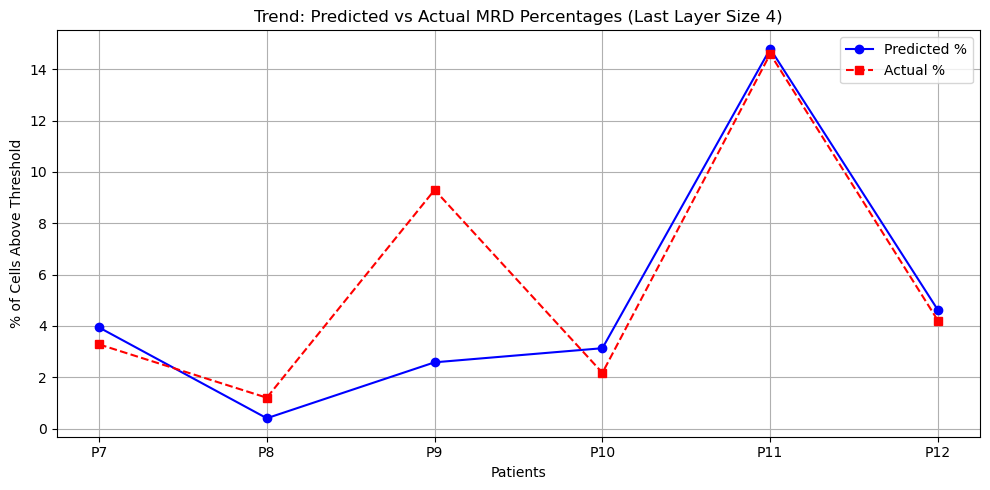

In [14]:
patients_ = ['P7', 'P8', 'P9', 'P10', 'P11', 'P12']

plt.figure(figsize=(10, 5))
plt.plot(patients_, predicted_percentages, marker='o', label='Predicted %', linestyle='-', color='blue')
plt.plot(patients_, actual_percentages, marker='s', label='Actual %', linestyle='--', color='red')

plt.xlabel('Patients')
plt.ylabel('% of Cells Above Threshold')
plt.title('Trend: Predicted vs Actual MRD Percentages (Last Layer Size 4)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

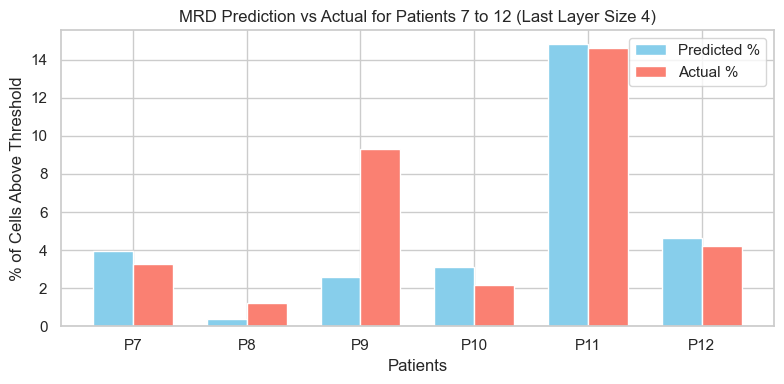

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Patient IDs
patients_ = ['P7', 'P8', 'P9', 'P10', 'P11', 'P12']

# # Predicted percentages by model
# predicted_percentages4 = [2.92, 0.78, 9.78, 2.8, 10.48, 2.9]

# Actual ground truth percentages

# Create a DataFrame for visualization
df_plot = pd.DataFrame({
    'Patient': patients_,
    'Predicted': predicted_percentages,
    'Actual': actual_percentages
})

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

# Plot bars
bar_width = 0.35
x = np.arange(len(patients_))
plt.bar(x - bar_width/2, df_plot['Predicted'], bar_width, label='Predicted %', color='skyblue')
plt.bar(x + bar_width/2, df_plot['Actual'], bar_width, label='Actual %', color='salmon')

# Add labels and legend
plt.xlabel('Patients')
plt.ylabel('% of Cells Above Threshold')
plt.title('MRD Prediction vs Actual for Patients 7 to 12 (Last Layer Size 4)')
plt.xticks(ticks=x, labels=patients_)
plt.legend()
plt.tight_layout()
plt.show()